# 03_Model

## 1. Preparing Data

### 1.1 Import Libraries

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.graph_objs import Scatter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### 1.2 Import Cartier Data

In [2]:
# Import cartier
cartier_df = pd.read_csv('../datasets/cartier.csv')
cartier_df.head()

,comments,omega
0,proud honored introduce new cartier forum stro...,0
1,glad opened forum,0
2,yay glad see powerhouse getting subforum reall...,0
3,step 1 cartier forum step 2 cartier wrist step...,0
4,thanks joined forum getting first real watch r...,0


In [3]:
cartier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14328 entries, 0 to 14327
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  14328 non-null  object
 1   omega     14328 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ KB


### 1.3 Import Omega Data

In [4]:
# Import omega
omega_df = pd.read_csv('../datasets/omega.csv')
omega_df.head()

,comments,omega
0,reference 2531 80 ask service history thanks,1
1,little know reference think inclined reissue s...,1
2,love railmaster,1
3,seven watch need seven watch first make one wa...,1
4,go omega tudor hour hand also though say dated...,1


In [5]:
omega_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  15000 non-null  object
 1   omega     15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


### 1.4 Combine Data

In [6]:
df = pd.concat([omega_df, cartier_df], ignore_index=True)
df

,comments,omega
0,reference 2531 80 ask service history thanks,1
1,little know reference think inclined reissue s...,1
2,love railmaster,1
3,seven watch need seven watch first make one wa...,1
4,go omega tudor hour hand also though say dated...,1
...,...,...
29323,trailer said possible check cartier watch hist...,0
29324,thanks informative reply,0
29325,moved cartier,0
29326,opening post cartier forum thought link stunni...,0


### 1.5 Define X and y

In [7]:
# Define X and y
X = df['comments']
y = df['omega']

In [8]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                   )

## 2. Model Test

We will test 3 models Logistic Regression, Naive Bayes, and Random Forest.  
These 3 are good at handling sparse high-dimentional data (large features with many features have zero) which what we have after vectorizer our text data.  
For each model we will try both Count and TF-IDF vectorizer.

### 2.1.1 Count Vectorizer & Logistic Regression Test

In [9]:
# Empty param for initial test
pipe_params = {
}

In [10]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=10_000)),
    ('lr', LogisticRegression(max_iter=200))
])

In [11]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [12]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 16.3 s
Wall time: 4.42 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_features=10000)),
                                       ('lr',
                                        LogisticRegression(max_iter=200))]),
             param_grid={})

In [13]:
gs.best_score_

0.8238583030804272

In [14]:
# Score model on training set.
gs.score(X_train, y_train)

0.9129524087875688

In [15]:
# Score model on testing set.
gs.score(X_test, y_test)

0.826684850551199

In [16]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

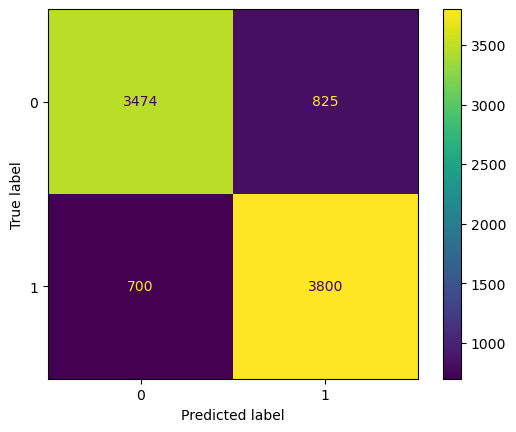

In [17]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)

disp.plot()

In [18]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.8444444444444444


In [19]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.8216216216216217


In [20]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.8080949057920447


In [21]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.8322951605174892


In [22]:
# AUC to compare models
cvec_lr_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_cvec_lr = roc_auc_score(y_test, cvec_lr_probabilities)
fpr_cvec_lr, tpr_cvec_lr, thresholds_cvec_lr = roc_curve(y_test, cvec_lr_probabilities)

### 2.1.2 TF-IDF Vectorizer and Logistic Regression

In [23]:
# Empty param for initial test
pipe_params = {
}

In [24]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=10_000)),
    ('lr', LogisticRegression(max_iter=200))
])

In [25]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [26]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 9.25 s
Wall time: 3.01 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(max_features=10000)),
                                       ('lr',
                                        LogisticRegression(max_iter=200))]),
             param_grid={})

In [27]:
gs.best_score_

0.8313601022359365

In [28]:
# Score model on training set.
gs.score(X_train, y_train)

0.8876710994203322

In [29]:
# Score model on testing set.
gs.score(X_test, y_test)

0.8332765086941698

In [30]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

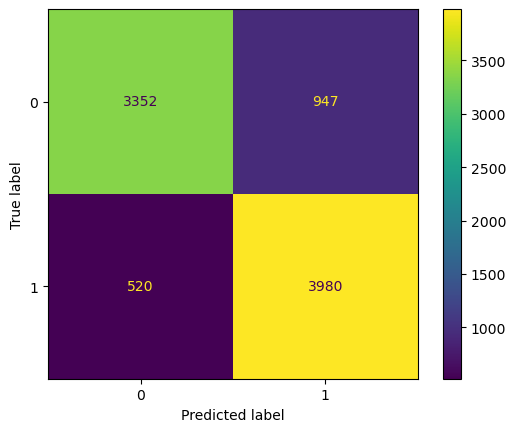

In [31]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)
disp.plot()

In [32]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.8844444444444445


In [33]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.8077937893241324


In [34]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.7797162130728076


In [35]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.8657024793388429


In [36]:
# AUC to compare models
tvec_lr_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_tvec_lr = roc_auc_score(y_test, tvec_lr_probabilities)
fpr_tvec_lr, tpr_tvec_lr, thresholds_cvec_lr = roc_curve(y_test, tvec_lr_probabilities)

### 2.2.1 Count Vectorizer - Naive Bayes

In [37]:
# Empty param for initial test
pipe_params = {
}

In [38]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_df=10_000)),
    ('nb', MultinomialNB())
])

In [39]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [40]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 2.44 s
Wall time: 2.44 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer(max_df=10000)),
                                       ('nb', MultinomialNB())]),
             param_grid={})

In [41]:
# Best score
gs.best_score_

0.8356957436697314

In [42]:
# Score model on training set.
gs.score(X_train, y_train)

0.8790004384042087

In [43]:
# Score model on testing set.
gs.score(X_test, y_test)

0.834981247869076

In [44]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

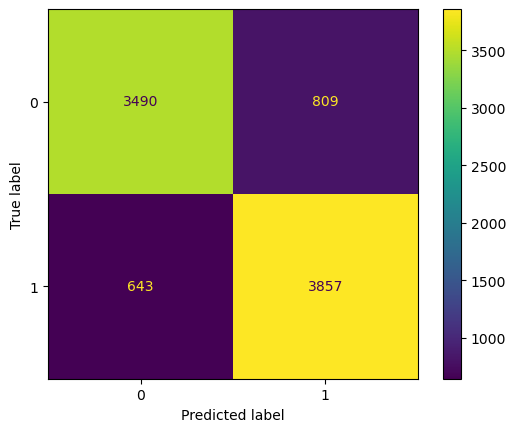

In [45]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)
disp.plot()

In [46]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.8571111111111112


In [47]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.8266180882983283


In [48]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.8118167015585019


In [49]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.8444229373336559


In [50]:
# AUC to compare models
cvec_nb_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_cvec_nb = roc_auc_score(y_test, cvec_nb_probabilities)
fpr_cvec_nb, tpr_cvec_nb, thresholds_cvec_nb = roc_curve(y_test, cvec_nb_probabilities)

### 2.2.2 TF-IDF Vectorizer and Naive Bayes

In [51]:
# Empty param for initial test
pipe_params = {
}

In [52]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=10_000)),
    ('nb', MultinomialNB())
])

In [53]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv=5)

In [54]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 2.27 s
Wall time: 2.27 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(max_features=10000)),
                                       ('nb', MultinomialNB())]),
             param_grid={})

In [55]:
# Best score
gs.best_score_

0.8310682385718768

In [56]:
# Score model on training set.
gs.score(X_train, y_train)

0.8761751668371572

In [57]:
# Score model on testing set.
gs.score(X_test, y_test)

0.8302079781793386

In [58]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

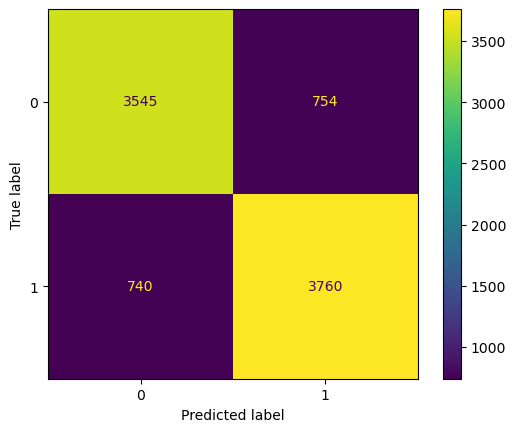

In [59]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)
disp.plot()

In [60]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.8355555555555556


In [61]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.8329641116526363


In [62]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.824610374505699


In [63]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.8273045507584598


In [64]:
# AUC to compare models
tvec_nb_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_tvec_nb = roc_auc_score(y_test, tvec_nb_probabilities)
fpr_tvec_nb, tpr_tvec_nb, thresholds_tvec_nb = roc_curve(y_test, tvec_nb_probabilities)

### 2.3.1 Count Vectorizer and Random Forest

In [65]:
# Empty param for initial test
pipe_params = {
}

In [66]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_features=10_000)),
    ('rf', RandomForestClassifier(max_depth=10))
])

In [67]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [68]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 7.33 s
Wall time: 7.31 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_features=10000)),
                                       ('rf',
                                        RandomForestClassifier(max_depth=10))]),
             param_grid={})

In [69]:
gs.best_score_

0.7756830116409662

In [70]:
# Score model on training set.
gs.score(X_train, y_train)

0.7853280724828292

In [71]:
# Score model on testing set.
gs.score(X_test, y_test)

0.7762245709739743

In [72]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

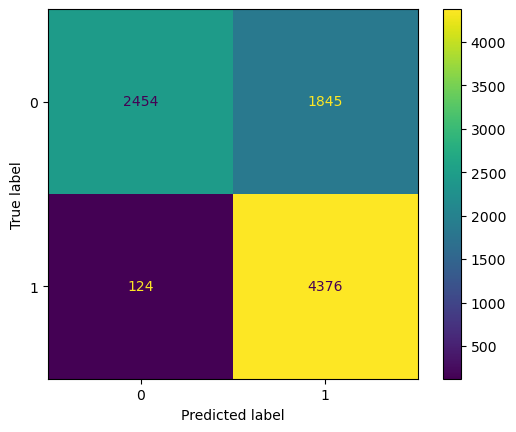

In [73]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)

disp.plot()

In [74]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.9724444444444444


In [75]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.703423886834914


In [76]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.5708304256803908


In [77]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.951900698215671


In [78]:
# AUC to compare models
cvec_rf_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_cvec_rf = roc_auc_score(y_test, cvec_rf_probabilities)
fpr_cvec_rf, tpr_cvec_rf, thresholds_cvec_rf = roc_curve(y_test, cvec_rf_probabilities)

### 2.3.2 TF-IDF Vectorizer and Random Forest

In [79]:
# Empty param for initial test
pipe_params = {
}

In [80]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_features=10_000)),
    ('rf', RandomForestClassifier(max_depth=10))
])

In [81]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [82]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 10.1 s
Wall time: 10.1 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(max_features=10000)),
                                       ('rf',
                                        RandomForestClassifier(max_depth=10))]),
             param_grid={})

In [83]:
gs.best_score_

0.7787029942812662

In [84]:
# Score model on training set.
gs.score(X_train, y_train)

0.7843538409079839

In [85]:
# Score model on testing set.
gs.score(X_test, y_test)

0.7764518695306285

In [86]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

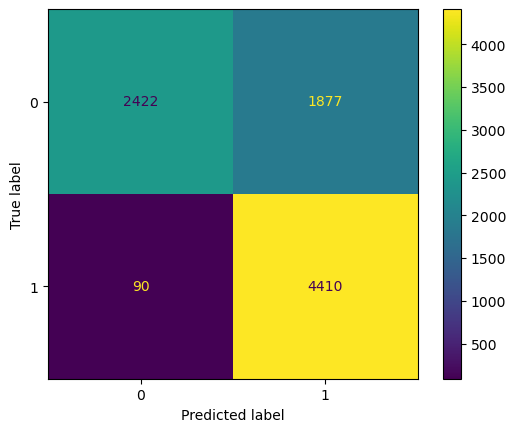

In [87]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)

disp.plot()

In [88]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.98


In [89]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.7014474312072531


In [90]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.5633868341474761


In [91]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.964171974522293


In [92]:
# AUC to compare models
tvec_rf_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_tvec_rf = roc_auc_score(y_test, tvec_rf_probabilities)
fpr_tvec_rf, tpr_tvec_rf, thresholds_tvec_rf = roc_curve(y_test, tvec_rf_probabilities)

## 3. Model Test Evaluation

### 3.1 Model Test ROC AUC

In [ ]:
# Create df for False Positive Rate and True Positive Rate
data = {
    "False Positive Rate": list(fpr_cvec_lr) + list(fpr_tvec_lr) + list(fpr_cvec_nb) + list(fpr_tvec_nb) + list(fpr_cvec_rf) + list(fpr_tvec_rf),
    "True Positive Rate": list(tpr_cvec_lr) + list(tpr_tvec_lr) + list(tpr_cvec_nb) + list(tpr_tvec_nb) + list(tpr_cvec_rf) + list(tpr_tvec_rf),
    "Model": [f"CVec-LogReg(AUC={round(auc_score_cvec_lr,2)})"]*len(fpr_cvec_lr) + [f"TVec-LogReg(AUC={round(auc_score_tvec_lr,2)})"]*len(fpr_tvec_lr) + 
             [f"CVec-NB(AUC={round(auc_score_cvec_nb,2)})"]*len(fpr_cvec_nb) + [f"TVec-NB(AUC={round(auc_score_tvec_nb,2)})"]*len(fpr_tvec_nb) + 
             [f"CVec-RF(AUC={round(auc_score_cvec_rf,2)})"]*len(fpr_cvec_rf) + [f"TVec-RF(AUC={round(auc_score_tvec_rf,2)})"]*len(fpr_tvec_rf)
}

df = pd.DataFrame(data)

# Create ROC AUC Comparison

fig = px.line(df, x="False Positive Rate", y="True Positive Rate", color="Model",
              title="Model Performance Comparison",
              labels={"False Positive Rate": "False Positive Rate", "True Positive Rate": "True Positive Rate"},
              markers=False, color_discrete_sequence=["red", "magenta", "blue", "cyan", "green", "lightgreen"])

fig.add_scatter(x=[0, 1], y=[0, 1], mode='lines', name='Baseline', line=dict(dash='dash', color='black'), showlegend=False)
    
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.update_layout(width=800, height=800)
fig.update_layout(title_font=dict(size=24),xaxis_title_font=dict(size=20), yaxis_title_font=dict(size=20))
    
fig.show()

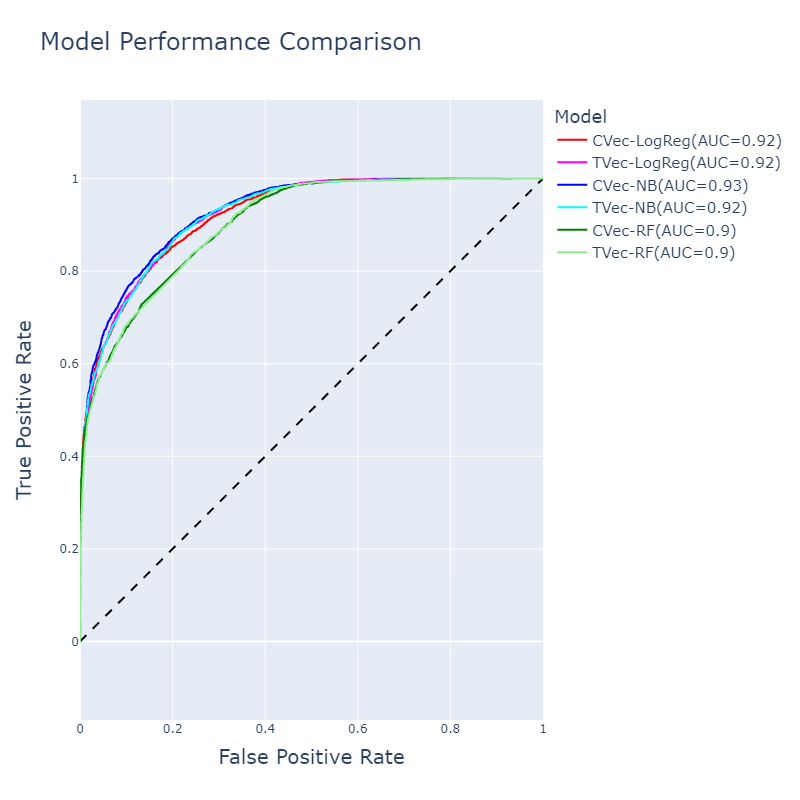

Logistic Regression and Naive Bayes models have good AUC scores. Means they correctly distinguish between the positive and negative classes and are robust and stable in predicting with confidence.

 but Count Vectorizer and Naive Bayes has slightly better AUC scores.  

Random Forest AUC scores are the lowest compared to the rest of the models.

### 3.2 Model Test Score Comparison

| Model                         | Processing Time |  Train Score | Test Score | Sensitivity | Precision | Specificity |
|:-----------------------------:|:---------------:|:------------:|:----------:|:-----------:|:---------:|:---------:|
| Count Vectororizer and Logistic Regression | 4.4s   | 0.9129    | 0.8266     | 0.8444      | 0.8216    | 0.8080    |
| TF-IDF Vectorizer and Logistic Regression | 3.0s   | 0.8876    | 0.8332     | 0.8844      | 0.8077    | 0.7797    |
| Count Vectorizer and Naive Bayes | 2.4s   | 0.8790  | 0.8349     | 0.8571      | 0.8266    | 0.8118    |
| TF-IDF Vectorizer and Naive Bayes| 2.2s   | 0.8761  | 0.8302     | 0.8355      | 0.8329    | 0.8246    |
| Count Vectorizer and Random Forest | 7.3s  | 0.7938  | 0.7795     | 0.9468      | 0.7146    | 0.6043    |
| TF-IDF Vectorizer and Random Forest | 10.1s   | 0.7893 | 0.7781     | 0.9733      | 0.7050    | 0.5738    |

### 3.3 Conclusion and What next?

We want to correctly identify Omega comments, so we want to look at the **sensitivity**.  

Logistic regression models tend to be overfitted, we can see from the different between train score and test score.

Random forest models have the highest sensitivity, but other scores are not balanced and they took the longest to train too.  

Naive Bayes models stand out for their combination of high test score, relatively high sensitivity and precision, and also the shortest to train.

Comparing the 2 Naive Bayes, **Count Vectorizer and Naive Bayes** has higher sensitivity, so will use it for hyperparameter tuning.

## 4. Model Hyperparameter Tuning

### 4.1 Count Vectorizer and Naive Bayes Hyperparameter Tuning

In [94]:
# # Pipe params, first attempt
# pipe_params = {
#     'cvec__max_features': [6_000, 9_000, 12_000, 15_000],
#     'cvec__min_df': [1, 2, 3],
#     'cvec__max_df': [.9, .95],
#     'cvec__ngram_range': [(1,1), (1,2), (1,3)],
#     'nb__alpha': [0.01, 0.1, 1, 10]
# }

To save time and resources, we conduct grid searches in smaller chunks through an iterative process.  
Above code is the first attempt of grid search.  
After we find best param from first attempt grid search, we dropped ngram 1,2 to speed up the next grid search.

In [95]:
# Pipe params, after adjustment
pipe_params = {
    'cvec__max_features': [10_500, 10_650, 10_800],
    'cvec__min_df': [2],
    'cvec__max_df': [.85],
    'cvec__ngram_range': [(1,1)],
    'nb__alpha': [0.8, 0.85, 0.9]
}

In [96]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [97]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [98]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 16.5 s
Wall time: 16.5 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.85],
                         'cvec__max_features': [10500, 10650, 10800],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 1)],
                         'nb__alpha': [0.8, 0.85, 0.9]})

In [99]:
# Best parameters
gs.best_params_

{'cvec__max_df': 0.85,
 'cvec__max_features': 10650,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'nb__alpha': 0.85}

### 4.2 Count Vectorizer and Naive Bayes with Best Parameters

In [100]:
# Empty params, since we already know the best params.
pipe_params = {
}

In [101]:
pipe = Pipeline([
    ('cvec', CountVectorizer(max_df=0.85, max_features=10_650, min_df=2, ngram_range=(1,1))),
    ('nb', MultinomialNB(alpha=0.85))
])

In [102]:
gs = GridSearchCV(pipe,
                  param_grid=pipe_params,
                  cv=5
                 )

In [103]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 2.17 s
Wall time: 2.16 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_df=0.85,
                                                        max_features=10650,
                                                        min_df=2)),
                                       ('nb', MultinomialNB(alpha=0.85))]),
             param_grid={})

In [104]:
# Best score
gs.best_score_

0.8333574644633414

In [105]:
# Score model on training set.
gs.score(X_train, y_train)

0.864289541624044

In [106]:
# Score model on testing set.
gs.score(X_test, y_test)

0.8357767928173656

In [107]:
# Get predictions
preds = gs.predict(X_test)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

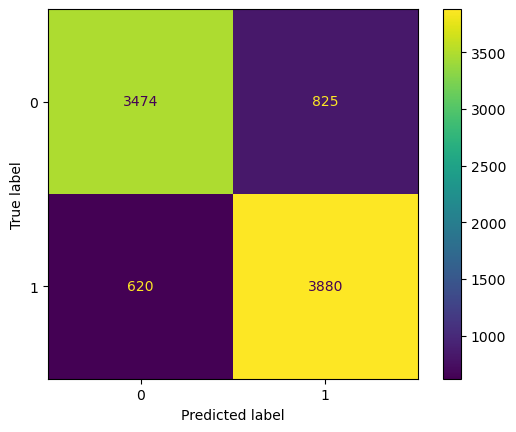

In [108]:
# View confusion matrix
cm = confusion_matrix(y_test, preds)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=gs.best_estimator_.classes_)
disp.plot()

In [109]:
# Calculate the sensitivity

sens = tp / (tp + fn)

print('Sensitivity:', sens)

Sensitivity: 0.8622222222222222


In [110]:
# Calculate the Precision

prec = tp / (tp + fp)

print('Precision:', prec)

Precision: 0.824654622741764


In [111]:
# Calculate the Specificity

spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.8080949057920447


In [112]:
# Calculate the Negative Predictive Value

npv = tn / (tn + fn)

print('Negative Predictive Value:', npv)

Negative Predictive Value: 0.8485588666340986


In [113]:
# AUC to compare models
cvec_nb_tuned_probabilities = gs.predict_proba(X_test)[:, 1]
auc_score_cvec_nb_tuned = roc_auc_score(y_test, cvec_nb_tuned_probabilities)
fpr_cvec_nb_tuned, tpr_cvec_nb_tuned, thresholds_cvec_nb_tuned = roc_curve(y_test, cvec_nb_tuned_probabilities)

## 5. Model Comparison After Hyperparameter Tuning

### 5.1 ROC AUC

In [ ]:
# Create df for False Positive Rate and True Positive Rate
data = {
    "False Positive Rate": list(fpr_cvec_nb) + list(fpr_cvec_nb_tuned),
    "True Positive Rate": list(tpr_cvec_nb) + list(tpr_cvec_nb_tuned),
    "Model": [f"CVec-NB(AUC={round(auc_score_cvec_nb,2)})"]*len(fpr_cvec_nb) + [f"CVec-NB-Tuned(AUC={round(auc_score_cvec_nb_tuned,2)})"]*len(fpr_cvec_nb_tuned)
}

df = pd.DataFrame(data)

# Create ROC AUC Comparison

fig = px.line(df, x="False Positive Rate", y="True Positive Rate", color="Model",
              title="Model Performance Comparison",
              labels={"False Positive Rate": "False Positive Rate", "True Positive Rate": "True Positive Rate"},
              markers=False, color_discrete_sequence=["blue", "red"])

fig.add_scatter(x=[0, 1], y=[0, 1], mode='lines', name='Baseline', line=dict(dash='dash', color='black'), showlegend=False)
    
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.update_layout(width=800, height=800)
fig.update_layout(title_font=dict(size=24),xaxis_title_font=dict(size=20), yaxis_title_font=dict(size=20))
    
fig.show()

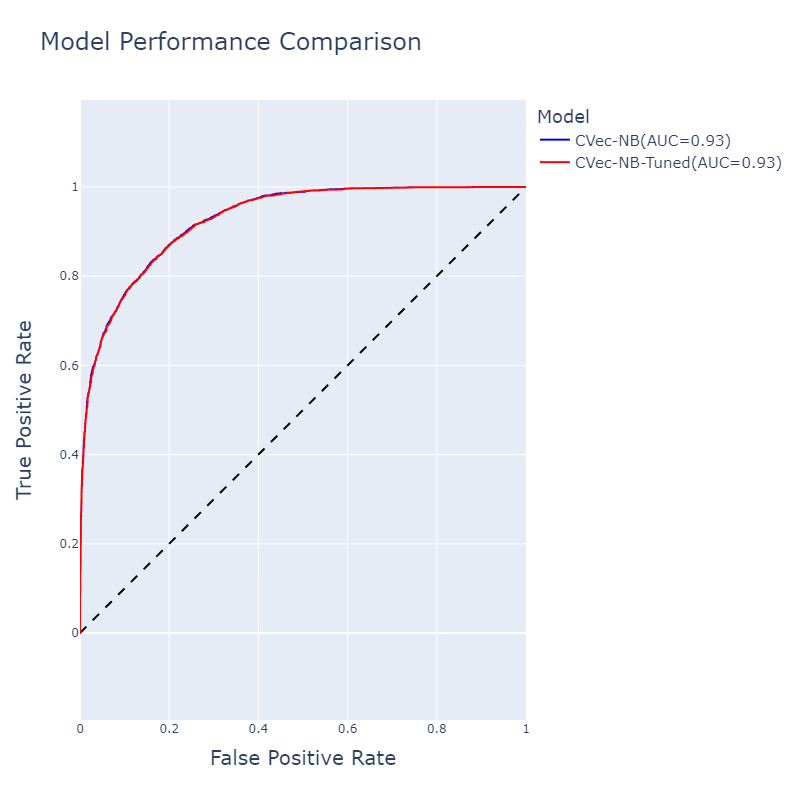

After hyperparameter tuning, the AUC score didn't change.

### 5.2 Comparing Score After Hyperparameter Tuning

| Model                         | Processing Time |  Train Score | Test Score | Sensitivity | Precision | Specificity |
|:-----------------------------:|:---------------:|:------------:|:----------:|:-----------:|:---------:|:---------:|
| Count Vectorizer and Naive Bayes | 2.44s   | 0.8790  | 0.8349     | 0.8571      | 0.8266    | 0.8118    |
| Count Vectorizer and Naive Bayes Tuned | 2.16s   | 0.8642  | 0.8357     | 0.8622      | 0.8246    | 0.8080    |


After tuning, we got faster and better model, less overfitted, higher accuracy and **sensitivity**.  
The model is getting better at correctly identifying Omega comments.